In [1]:
"""
Rhode Schwarz (BatMaus) Demo
Author: Andrei V.
"""

# from slab import *
# from slab.datamanagement import SlabFile
import numpy as np
import os
import datetime
import os.path
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib notebook

import RhodeSchwarz
reload(RhodeSchwarz)

from RhodeSchwarz import RhodeSchwarz
from RhodeSchwarz import ZVB8


Warning could not load Chase AWG dll, check that dll located at 'C:\_Lib\python\slab\instruments\awg\chase\dax22000_lib_DLL32.dll'
Could not load InstrumentManagerWindow
Warning could not load LDA labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_atten64.dll'
Warning could not load LMS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\vnx_fmsynth.dll'
Warning could not load LPS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_dps64.dll'
Could not load labbrick


C:\ProgramData\Anaconda3\envs\py36vis\lib\site-packages\IPython\qt.py:13: ShimWarning: The `IPython.qt` package has been deprecated since IPython 4.0. You should import from qtconsole instead.
  "You should import from qtconsole instead.", ShimWarning)


Warning could not load LDA labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_atten64.dll'
Warning could not load LMS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\vnx_fmsynth.dll'
Warning could not load LPS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_dps64.dll'
Could not load labbrick
Could not load BKPowerSupply
Could not load Autonics TM4 Driver


In [2]:
# rs = RhodeSchwarz(address='192.168.14.190')
rs = ZVB8(address='192.168.14.231', reset = True)

In [3]:
rs.get_id()

I'm Bat Mouse!


'Rohde-Schwarz,ZNB8-4Port,1311601044101437,3.20\n'

## Initialize Signal Core

In [7]:
im = InstrumentManager()
from slab import *
from slab.instruments import * 
im = InstrumentManager()
sc = im["scqubB"]

In [3]:
sc.get_id()

'Default Instrument SignalCore'

In [9]:
sc.get_rf_parameters()

In [10]:
rfparams = sc.get_rf_parameters()
time.sleep(0.2)
settingparams = sc.get_device_status()
time.sleep(0.2)
print(" ==== DRIVE LO SETTINGS ==== ")
print("RF1 OUT ENABLED: %s"%settingparams.operate_status.rf1_out_enable)
print("RF1 STANDBY: %s"%settingparams.operate_status.rf1_standby)
print("RF1 EXT REF DETECTED: %s"%settingparams.operate_status.ext_ref_detect)
print("RF1 FREQ: %s"%(rfparams.rf1_freq))
print("RF1 LEVEL: %s"%(rfparams.rf_level))

 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 8000000000
RF1 LEVEL: -20.0


# Q0

## Find readout

In [14]:
trans_settings = rs.trans_default_settings()
trans_settings['start_freq'] = 6.164655e9-2.5e6
trans_settings['stop_freq'] = 6.164655e9+2.5e6
trans_settings['avg_time'] = 10
trans_settings['ifBW'] = 200
trans_settings['RFpower'] = -25
trans_settings['freq_points'] = 1001
trans_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 6162155000.0,
 'stop_freq': 6167155000.0,
 'freq_points': 1001,
 'RFpower': -25,
 'ifBW': 200,
 'mode': 'MOV'}

In [15]:
data = rs.trans_meas(trans_settings)

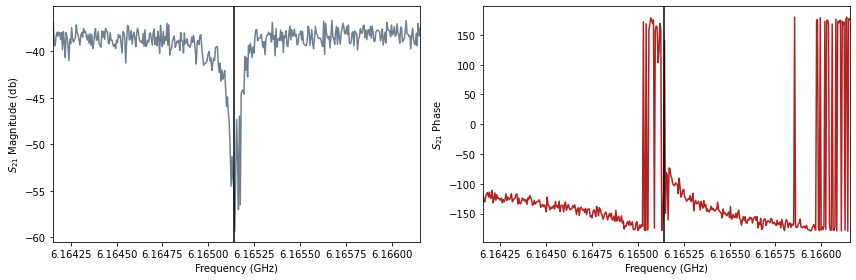

In [21]:
omegares = 6.16514
span = 6.164655 + np.array([-0.5,1.5])*1e-3
marker = 6.16514

fig, ax = plt.subplots(1,2,figsize=(12, 4));

ax1 = ax[0]
ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

ax1 = ax[1]
ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Phase');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

plt.tight_layout()

In [22]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2

spec_settings['start_freq'] = 4.7789e9 - 50e6
spec_settings['stop_freq'] = 4.7789e9 + 50e6
spec_settings['RFpower'] = -5
spec_settings['CAVfreq'] = omegares*1e9
spec_settings['CAVpower'] = -25
spec_settings['avg_time'] = 10
spec_settings['ifBW'] = 1000
trans_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'

spec_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 4728900000.0,
 'stop_freq': 4828900000.0,
 'freq_points': 1001,
 'RFpower': -5,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -25,
 'CAVfreq': 6165140000.0,
 'ifBW': 1000,
 'mode': 'MOV'}

In [23]:
data = []
data = rs.spec_meas(spec_settings)

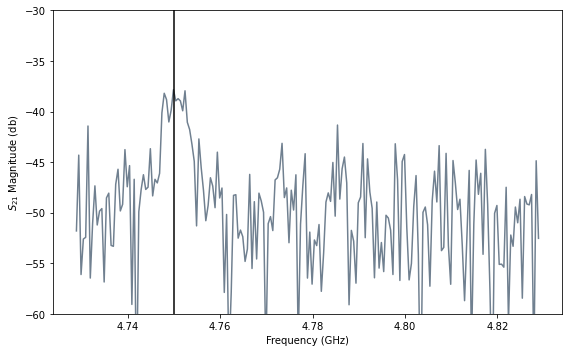

In [26]:
# span = 6.166976 + np.array([-1,2])*1e-3
omegaq = 4.75

fig, ax = plt.subplots(figsize=(8, 5));

ax1 = ax
ax1.plot(data['freq']/1e9, data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
# ax1.set_xlim(span)
ax1.set_ylim([-60,-30])
ax1.axvline(omegaq , color = 'k')


plt.tight_layout()

## Resonator Transmission with SignalCore on @ this freq (-10dBm)

In [140]:
sc.set_frequency(omegaq*1e9)
sc.set_power(5)
sc.set_clock_reference(ext_ref=True)
sc.set_output_state(True)
sc.set_rf_mode(val=0) # single RF tone on output 1
sc.set_standby(False)
sc.set_rf2_standby(True) # no output on RF 2
time.sleep(0.2)
rfparams = sc.get_rf_parameters()
time.sleep(0.2)
settingparams = sc.get_device_status()
time.sleep(0.2)
print(" ==== DRIVE LO SETTINGS ==== ")
print("RF1 OUT ENABLED: %s"%settingparams.operate_status.rf1_out_enable)
print("RF1 STANDBY: %s"%settingparams.operate_status.rf1_standby)
print("RF1 EXT REF DETECTED: %s"%settingparams.operate_status.ext_ref_detect)
print("RF1 FREQ: %s"%(rfparams.rf1_freq))
print("RF1 LEVEL: %s"%(rfparams.rf_level))

 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4750000000
RF1 LEVEL: 5.0


In [141]:
rs.reset()
trans_settings = rs.trans_default_settings()
trans_settings['start_freq'] = omegares*1e9-2.5e6
trans_settings['stop_freq'] = omegares*1e9+1.5e6
trans_settings['avg_time'] = 30
trans_settings['ifBW'] = 200
trans_settings['RFpower'] = -25
trans_settings['freq_points'] = 1001
trans_settings

{'channel': 1,
 'avg_time': 30,
 'measurement': 'S21',
 'start_freq': 6162640000.0,
 'stop_freq': 6166640000.0,
 'freq_points': 1001,
 'RFpower': -25,
 'ifBW': 200,
 'mode': 'MOV'}

In [142]:
data = rs.trans_meas(trans_settings)

## Power 5

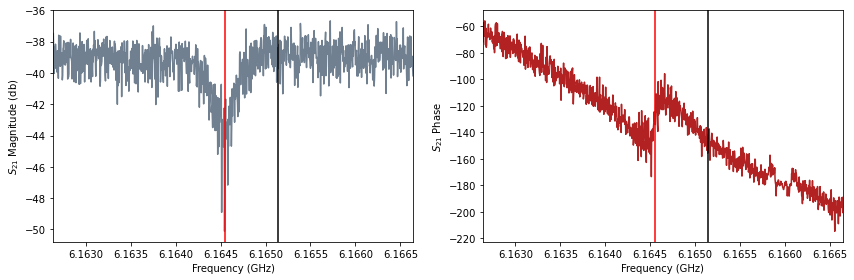

In [145]:
span = omegares + np.array([-2.5,1.5])*1e-3
omegarese = 6.16455
marker = omegares
marker2 = omegarese

fig, ax = plt.subplots(1,2,figsize=(12, 4));

ax1 = ax[0]
ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
# ax1.set_ylim([-50,-30])
ax1.axvline(marker , color = 'k')
ax1.axvline(marker2,color = 'r')

ax1 = ax[1]
ax1.plot(data['freq']/1e9,np.unwrap(data['phase'],180), color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Phase');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')
ax1.axvline(marker2,color = 'r')

plt.tight_layout()

## Qubit drive at estimated anharmonicity

In [150]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2

spec_settings['start_freq'] = omegaq * 1e9 - 30e6 - 237e6
spec_settings['stop_freq'] = omegaq * 1e9 + 30e6 - 237e6
spec_settings['RFpower'] = -5
spec_settings['CAVfreq'] = omegarese * 1e9
spec_settings['CAVpower'] = -25
spec_settings['avg_time'] = 10
spec_settings['ifBW'] = 200
# trans_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'

spec_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 4483000000.0,
 'stop_freq': 4543000000.0,
 'freq_points': 1001,
 'RFpower': -5,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -25,
 'CAVfreq': 6164550000.0,
 'ifBW': 200,
 'mode': 'MOV'}

In [151]:
data = []
data = rs.spec_meas(spec_settings)

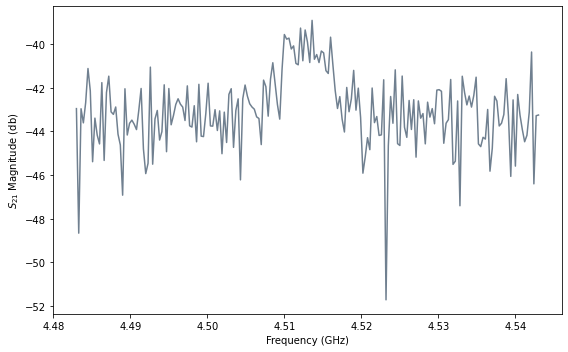

In [152]:
fig, ax = plt.subplots(figsize=(8, 5));

ax1 = ax
ax1.plot(data['freq']/1e9, data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');

plt.tight_layout()

# Process works for Q0, extend this to scanning over entire lattice 

In [166]:
im = InstrumentManager()
from slab import *
from slab.instruments import * 
im = InstrumentManager()
sc = im["scqubB"]

In [169]:
sc.set_frequency(8*1e9)
sc.set_power(-25)
sc.set_clock_reference(ext_ref=True)
sc.set_output_state(False)
sc.set_rf_mode(val=0) # single RF tone on output 1
sc.set_standby(False)
sc.set_rf2_standby(True) # no output on RF 2
time.sleep(0.2)
rfparams = sc.get_rf_parameters()
time.sleep(0.2)
settingparams = sc.get_device_status()
time.sleep(0.2)
print(" ==== DRIVE LO SETTINGS ==== ")
print("RF1 OUT ENABLED: %s"%settingparams.operate_status.rf1_out_enable)
print("RF1 STANDBY: %s"%settingparams.operate_status.rf1_standby)
print("RF1 EXT REF DETECTED: %s"%settingparams.operate_status.ext_ref_detect)
print("RF1 FREQ: %s"%(rfparams.rf1_freq))
print("RF1 LEVEL: %s"%(rfparams.rf_level))

 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 0
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 8000000000
RF1 LEVEL: -25.0


## Resonator readout scans

In [206]:
importedomegaresgarray = [6.1645,6.38975,6.61285,6.8297,6.95204,6.72765,6.501155,6.27853]
importedomegaqgarray =  [4.749676,4.84949,4.680245,4.900071,4.717056,4.875475,4.733646,6.05]

In [207]:
dataarray = []
resonatorbw = 8e6
for ii in [0,1,2,3,4,5,6]:
    rs.reset()
    time.sleep(0.2)
    trans_settings = rs.trans_default_settings()
    trans_settings['start_freq'] = importedomegaresgarray[ii]*1e9-resonatorbw/2
    trans_settings['stop_freq'] = importedomegaresgarray[ii]*1e9+resonatorbw/2
    trans_settings['avg_time'] = 5
    trans_settings['ifBW'] = 200
    trans_settings['RFpower'] = -25
    trans_settings['freq_points'] = 1001
    trans_settings
    dataarray.append(rs.trans_meas(trans_settings))

<IPython.core.display.Javascript object>


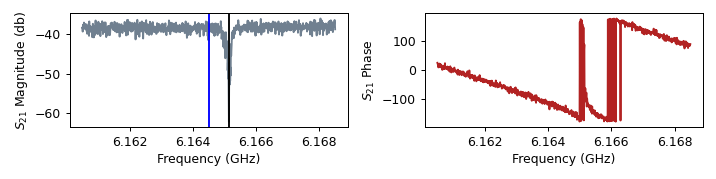

<IPython.core.display.Javascript object>


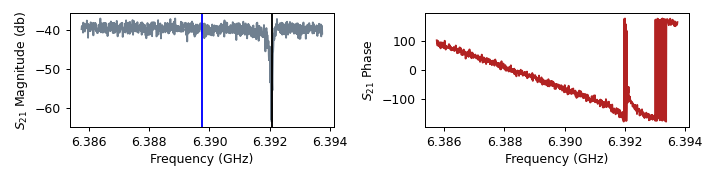

<IPython.core.display.Javascript object>


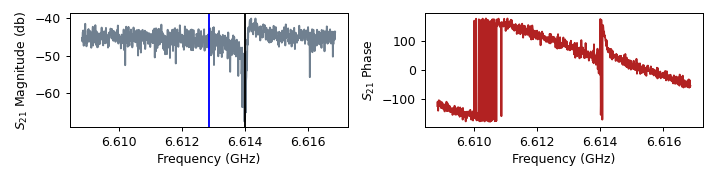

<IPython.core.display.Javascript object>


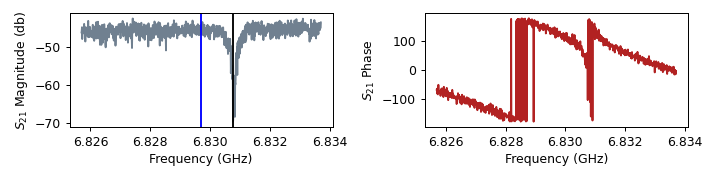

<IPython.core.display.Javascript object>


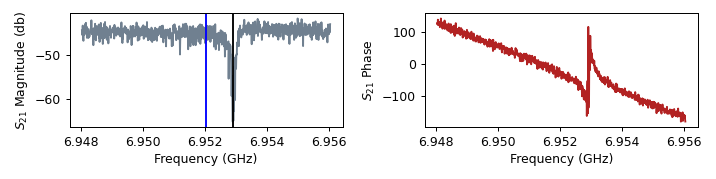

<IPython.core.display.Javascript object>


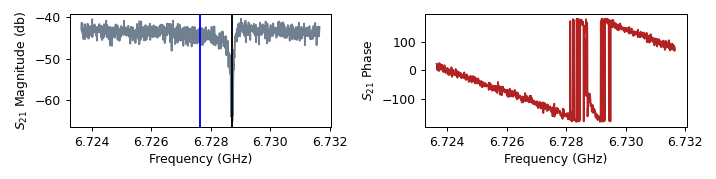

<IPython.core.display.Javascript object>


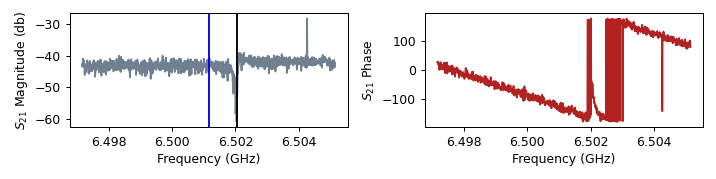

In [209]:
omegaresgarray = []
for ii in [0,1,2,3,4,5,6]:
    data = dataarray[ii]

    fig, ax = plt.subplots(1,2,figsize=(8, 2));

    ax1 = ax[0]
    ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
#     yhat = savgol_filter(y, 51, 3)
#     p = fitlor(data['freq']/1e9,savgol_filter(data['mag'],51,7))
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Magnitude (db)');
#     ax1.set_xlim(span)
#     ax1.axvline(p[2] , color = 'k')
    ax1.axvline((data['freq']/1e9)[np.argmin(data['mag'])] , color = 'k')
    ax1.axvline(importedomegaresgarray[ii],color = 'b',label = 'importedomegares')

    ax1 = ax[1]
    ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Phase');
#     ax1.set_xlim(span)
#     ax1.axvline(marker , color = 'k')

    plt.tight_layout()
    
    omegaresgarray.append((data['freq']/1e9)[np.argmin(data['mag'])])

## Two tone Spec across lattice

In [214]:
dataarray = []
for ii in [0,1,2,3,4,5,6]:
    rs.reset()
    spec_settings = rs.spec_default_settings()
    spec_settings['CAVport'] = 1
    spec_settings['RFport'] = 3
    spec_settings['Mport'] = 2

    spec_settings['start_freq'] = importedomegaqgarray[ii] * 1e9 - 20e6
    spec_settings['stop_freq'] = importedomegaqgarray[ii] * 1e9 + 20e6
    spec_settings['RFpower'] = -5
    spec_settings['CAVfreq'] = omegaresgarray[ii]*1e9
    spec_settings['CAVpower'] = -25
    spec_settings['avg_time'] = 10
    spec_settings['ifBW'] = 1000
    trans_settings['freq_points'] = 1001
    spec_settings['measurement'] = 'S21'
    spec_settings
    
    dataarray.append(rs.spec_meas(spec_settings))

In [215]:
from scipy.signal import savgol_filter
from slab.dsfit import fitlor
from slab.dsfit import lorfunc

<IPython.core.display.Javascript object>


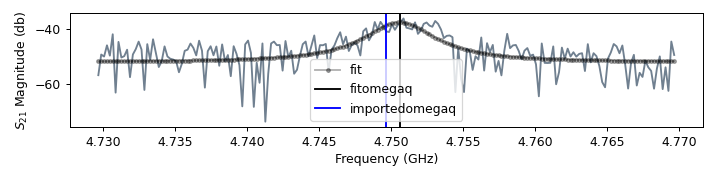

<IPython.core.display.Javascript object>


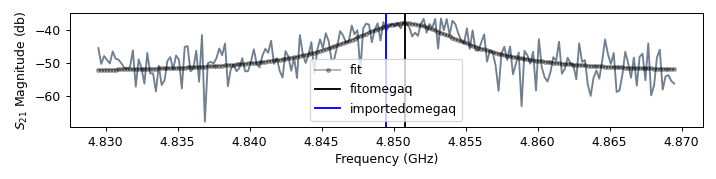

<IPython.core.display.Javascript object>


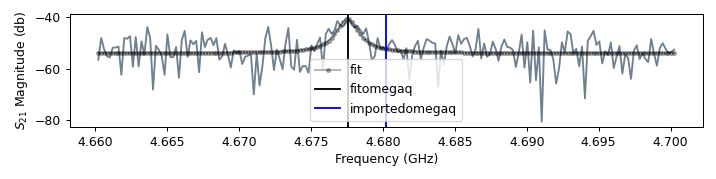

<IPython.core.display.Javascript object>


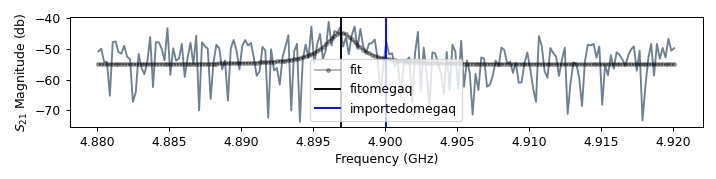

<IPython.core.display.Javascript object>


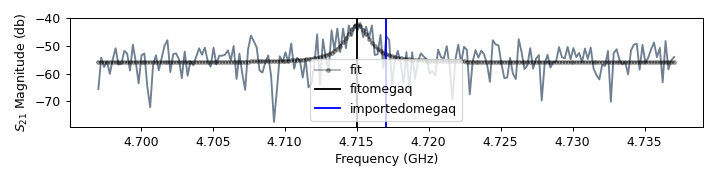

<IPython.core.display.Javascript object>


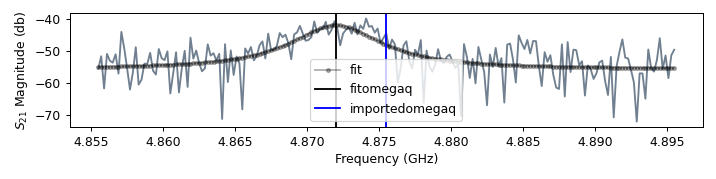

<IPython.core.display.Javascript object>


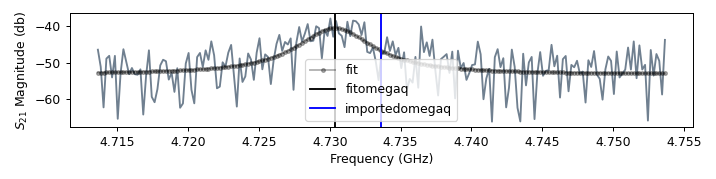

In [217]:
omegaqgarray = []
for ii in [0,1,2,3,4,5,6]:
    data = dataarray[ii]
    fig, ax = plt.subplots(figsize=(8, 2));
    ax1 = ax
    ax1.plot(data['freq']/1e9, data['mag'], color = 'slategrey')
    p = fitlor(data['freq']/1e9, data['mag'])
    ax1.plot(data['freq']/1e9, lorfunc(p, data['freq']/1e9), 'k.-', label='fit',alpha = 0.3)
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Magnitude (db)');
    # ax1.set_xlim(span)
#     ax1.set_ylim([-60,-30])
    ax1.axvline(p[2] , color = 'k',label = 'fitomegaq')
    ax1.axvline(importedomegaqgarray[ii],color = 'b',label = 'importedomegaq')

    plt.tight_layout()
    plt.legend()
    
    omegaqgarray.append(p[2])

## Find |e> state for resonators

In [229]:
dataarray = []
for ii in [0,1,2,3,4,5,6]:
    time.sleep(0.2)
    sc.set_frequency(omegaqgarray[ii]*1e9)
    sc.set_power(5)
    sc.set_clock_reference(ext_ref=True)
    sc.set_output_state(True)
    sc.set_rf_mode(val=0) # single RF tone on output 1
    sc.set_standby(False)
    sc.set_rf2_standby(True) # no output on RF 2
    time.sleep(0.2)
    rfparams = sc.get_rf_parameters()
    time.sleep(0.2)
    settingparams = sc.get_device_status()
    time.sleep(0.2)
    print(" ==== DRIVE LO SETTINGS ==== ")
    print("RF1 OUT ENABLED: %s"%settingparams.operate_status.rf1_out_enable)
    print("RF1 STANDBY: %s"%settingparams.operate_status.rf1_standby)
    print("RF1 EXT REF DETECTED: %s"%settingparams.operate_status.ext_ref_detect)
    print("RF1 FREQ: %s"%(rfparams.rf1_freq))
    print("RF1 LEVEL: %s"%(rfparams.rf_level))
    time.sleep(0.2)
    
    rs.reset()
    trans_settings = rs.trans_default_settings()
    trans_settings['start_freq'] = omegaresgarray[ii]*1e9-2.5e6
    trans_settings['stop_freq'] = omegaresgarray[ii]*1e9+1.5e6
    trans_settings['avg_time'] = 20
    trans_settings['ifBW'] = 200
    trans_settings['RFpower'] = -25
    trans_settings['freq_points'] = 1001
    trans_settings
    dataarray.append(rs.trans_meas(trans_settings))
time.sleep(0.2)
sc.set_frequency(8*1e9)
sc.set_power(-25)
sc.set_clock_reference(ext_ref=True)
sc.set_output_state(False)
sc.set_rf_mode(val=0) # single RF tone on output 1
sc.set_standby(False)
sc.set_rf2_standby(True) # no output on RF 2
time.sleep(0.2)
rfparams = sc.get_rf_parameters()
time.sleep(0.2)
settingparams = sc.get_device_status()
time.sleep(0.2)
print(" ==== DRIVE LO SETTINGS ==== ")
print("RF1 OUT ENABLED: %s"%settingparams.operate_status.rf1_out_enable)
print("RF1 STANDBY: %s"%settingparams.operate_status.rf1_standby)
print("RF1 EXT REF DETECTED: %s"%settingparams.operate_status.ext_ref_detect)
print("RF1 FREQ: %s"%(rfparams.rf1_freq))
print("RF1 LEVEL: %s"%(rfparams.rf_level))
time.sleep(0.2)

 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4750595626
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4850763913
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4677553322
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4896940736
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4715044030
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4871980235
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4730357412
RF1 LEVEL: 5.0


<IPython.core.display.Javascript object>


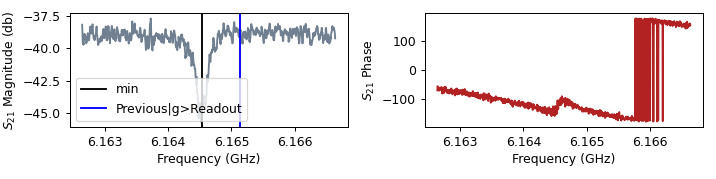

<IPython.core.display.Javascript object>


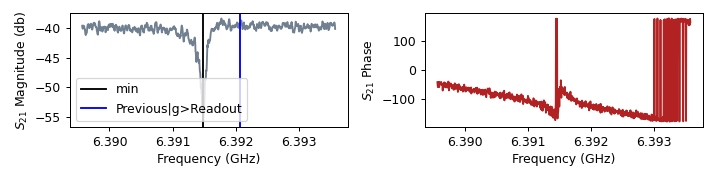

<IPython.core.display.Javascript object>


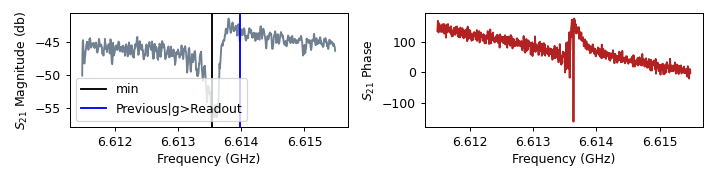

<IPython.core.display.Javascript object>


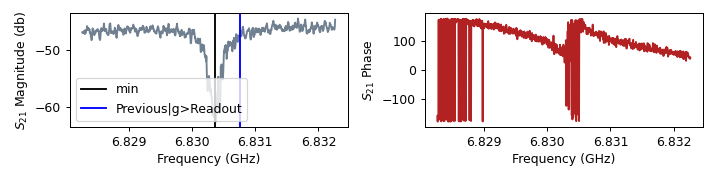

<IPython.core.display.Javascript object>


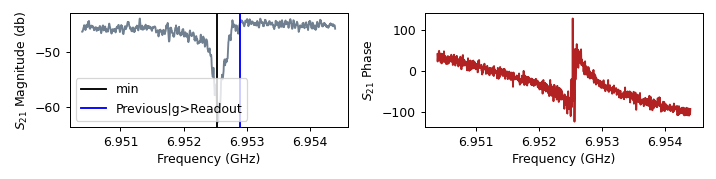

<IPython.core.display.Javascript object>


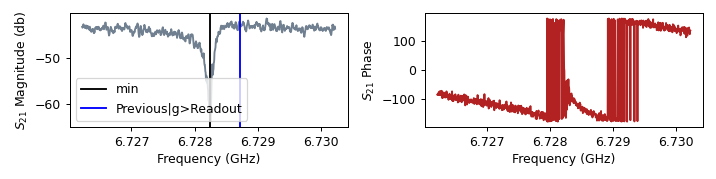

<IPython.core.display.Javascript object>


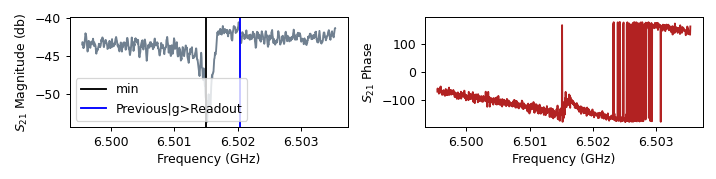

In [234]:
omegaresearray = []
for ii in [0,1,2,3,4,5,6]:
    data = dataarray[ii]

    fig, ax = plt.subplots(1,2,figsize=(8, 2));

    ax1 = ax[0]
    ax1.plot(data['freq']/1e9,savgol_filter(data['mag'],11,3), color = 'slategrey')
#     yhat = savgol_filter(y, 51, 3)
#     p = fitlor(data['freq']/1e9,savgol_filter(data['mag'],51,7))
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Magnitude (db)');
#     ax1.set_xlim(span)
#     ax1.axvline(p[2] , color = 'k')
    ax1.axvline((data['freq']/1e9)[np.argmin(savgol_filter(data['mag'],21,5))] , color = 'k',label = 'min')
    ax1.axvline(omegaresgarray[ii],color = 'b',label = 'Previous|g>Readout')
    ax1.legend()
    ax1 = ax[1]
    ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Phase');
#     ax1.set_xlim(span)
#     ax1.axvline(marker , color = 'k')

    plt.tight_layout()
    
    omegaresearray.append((data['freq']/1e9)[np.argmin(data['mag'])])

## Drive qubit |e> transition

In [237]:
importedEcarray = [-0.2403,-0.25,-0.24,-0.246,-0.236,-0.242,-0.24,-250]

In [255]:
dataarray = []
for ii in [0,1,2,3,4,5,6]:
    time.sleep(0.2)
    sc.set_frequency(omegaqgarray[ii]*1e9)
    sc.set_power(5)
    sc.set_clock_reference(ext_ref=True)
    sc.set_output_state(True)
    sc.set_rf_mode(val=0) # single RF tone on output 1
    sc.set_standby(False)
    sc.set_rf2_standby(True) # no output on RF 2
    time.sleep(0.2)
    rfparams = sc.get_rf_parameters()
    time.sleep(0.2)
    settingparams = sc.get_device_status()
    time.sleep(0.2)
    print(" ==== DRIVE LO SETTINGS ==== ")
    print("RF1 OUT ENABLED: %s"%settingparams.operate_status.rf1_out_enable)
    print("RF1 STANDBY: %s"%settingparams.operate_status.rf1_standby)
    print("RF1 EXT REF DETECTED: %s"%settingparams.operate_status.ext_ref_detect)
    print("RF1 FREQ: %s"%(rfparams.rf1_freq))
    print("RF1 LEVEL: %s"%(rfparams.rf_level))
    time.sleep(0.2)
    
    rs.reset()

    spec_settings = rs.spec_default_settings()
    spec_settings['CAVport'] = 1
    spec_settings['RFport'] = 3
    spec_settings['Mport'] = 2

    spec_settings['start_freq'] = omegaqgarray[ii] * 1e9 - 30e6 + importedEcarray[ii] * 1e9
    spec_settings['stop_freq'] = omegaqgarray[ii] * 1e9 + 30e6 + importedEcarray[ii] * 1e9
    spec_settings['RFpower'] = -5
    spec_settings['CAVfreq'] = omegaresearray[ii] * 1e9
    spec_settings['CAVpower'] = -25
    spec_settings['avg_time'] = 60
    spec_settings['ifBW'] = 50
    # trans_settings['freq_points'] = 1001
    spec_settings['measurement'] = 'S21'

    spec_settings
    
    dataarray.append(rs.spec_meas(spec_settings))
time.sleep(0.2)
sc.set_frequency(8*1e9)
sc.set_power(-25)
sc.set_clock_reference(ext_ref=True)
sc.set_output_state(False)
sc.set_rf_mode(val=0) # single RF tone on output 1
sc.set_standby(False)
sc.set_rf2_standby(True) # no output on RF 2
time.sleep(0.2)
rfparams = sc.get_rf_parameters()
time.sleep(0.2)
settingparams = sc.get_device_status()
time.sleep(0.2)
print(" ==== DRIVE LO SETTINGS ==== ")
print("RF1 OUT ENABLED: %s"%settingparams.operate_status.rf1_out_enable)
print("RF1 STANDBY: %s"%settingparams.operate_status.rf1_standby)
print("RF1 EXT REF DETECTED: %s"%settingparams.operate_status.ext_ref_detect)
print("RF1 FREQ: %s"%(rfparams.rf1_freq))
print("RF1 LEVEL: %s"%(rfparams.rf_level))
time.sleep(0.2)

 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4750595626
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4850763913
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4677553322
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4896940736
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4715044030
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4871980235
RF1 LEVEL: 5.0
 ==== DRIVE LO SETTINGS ==== 
RF1 OUT ENABLED: 1
RF1 STANDBY: 0
RF1 EXT REF DETECTED: 1
RF1 FREQ: 4730357412
RF1 LEVEL: 5.0


### ifbw 50Hz av 60s

<IPython.core.display.Javascript object>


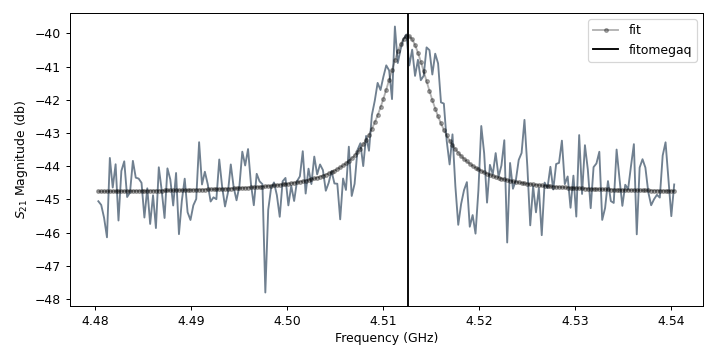

<IPython.core.display.Javascript object>


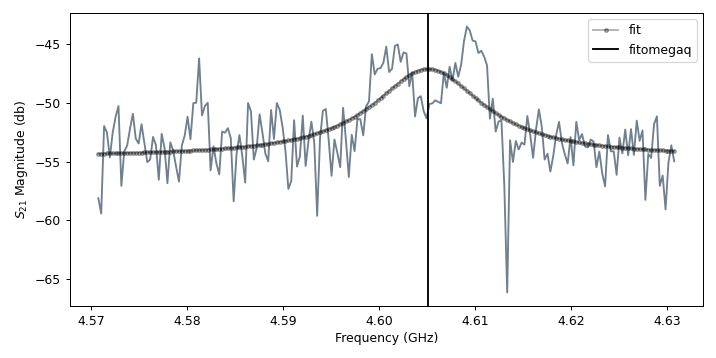

<IPython.core.display.Javascript object>


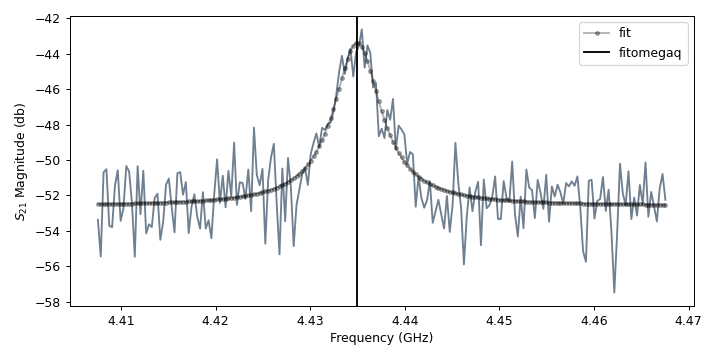

<IPython.core.display.Javascript object>


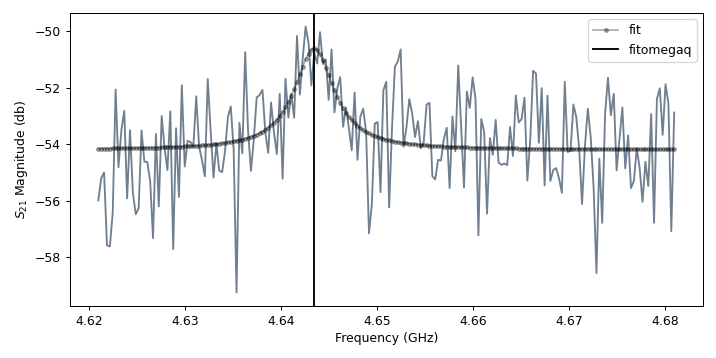

<IPython.core.display.Javascript object>


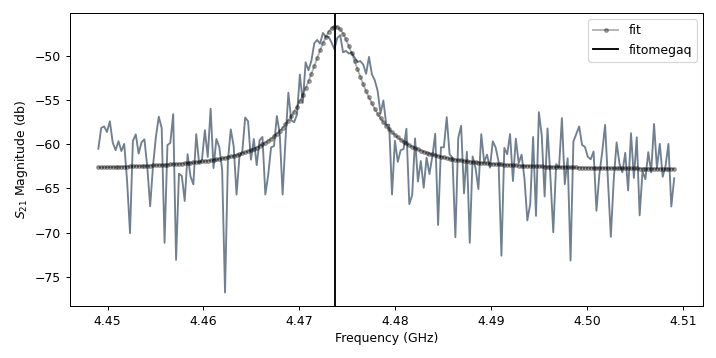

<IPython.core.display.Javascript object>


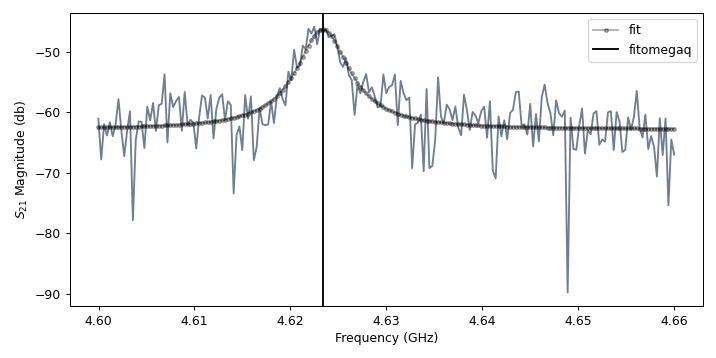

<IPython.core.display.Javascript object>


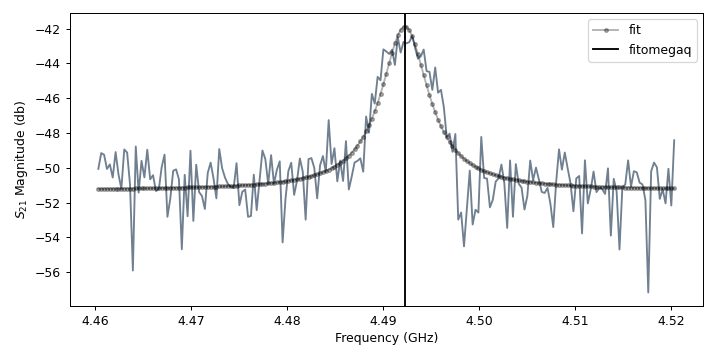

In [256]:
omegaqearray = []
for ii in [0,1,2,3,4,5,6]:
    data = dataarray[ii]
    fig, ax = plt.subplots(figsize=(8, 4));
    ax1 = ax
    ax1.plot(data['freq']/1e9, data['mag'], color = 'slategrey')
    p = fitlor(data['freq']/1e9, data['mag'])
    ax1.plot(data['freq']/1e9, lorfunc(p, data['freq']/1e9), 'k.-', label='fit',alpha = 0.3)
    ax1.set_xlabel('Frequency (GHz)');
    ax1.set_ylabel('$S_{21}$ Magnitude (db)');

    ax1.axvline(p[2] , color = 'k',label = 'fitomegaq')
#     ax1.axvline(importedomegaqgarray[ii],color = 'b',label = 'importedomegaq')

    plt.tight_layout()
    plt.legend()
    
    omegaqearray.append(p[2])

In [258]:
Uarray = np.array(omegaqearray.copy()) - np.array(omegaqgarray.copy())
Uarray

array([-0.23807086, -0.24564598, -0.24258586, -0.2535195 , -0.24130961,
       -0.24861161, -0.23806611])

## NOTE: Q1 e/f state appears to be hybridizing with something! Q4 g/f/2?

### A few nearby resonance distances ot Q1 ef, starting with g/f/2 of Q4

In [271]:
(freqlist[4] + Uarray[4]/2) - (freqlist[1] + Uarray[1])

-0.007442826428898819

### Q6 g/f

In [273]:
(freqlist[6] + Uarray[6]/2) - (freqlist[1] + Uarray[1])

0.010768924543055114

### Q5 e/f

In [272]:
(freqlist[5] + Uarray[5]) - (freqlist[1] + Uarray[1])

0.023019365397575875

Text(0.5, 1.0, "Qubit Transitions w/ Measured Ec's")

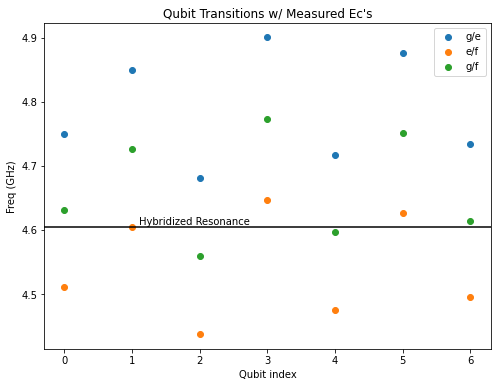

In [2]:
freqlist = np.array([4.749676,4.84949,4.680245,4.900071,4.717056,4.875475,4.733646])
Uarray = np.array([-0.23807086, -0.24564598, -0.24258586, -0.2535195 , -0.24130961,
       -0.24861161, -0.23806611])
eflist = freqlist + Uarray
gflist = freqlist + Uarray/2
plt.figure(figsize = (8,6))
plt.scatter(range(len(freqlist)),freqlist,label = 'g/e')
plt.scatter(range(len(freqlist)),eflist,label = 'e/f')
plt.scatter(range(len(freqlist)),gflist,label = 'g/f')
plt.axhline(freqlist[1] + Uarray[1],c = 'k')
plt.legend()
plt.xlabel('Qubit index')
plt.ylabel('Freq (GHz)')
plt.text(1.1,freqlist[1] + Uarray[1]+0.0050,'Hybridized Resonance')
plt.title('Qubit Transitions w/ Measured Ec\'s')

Text(0.5, 1.0, 'Qubit Transitions for >U Stagger')

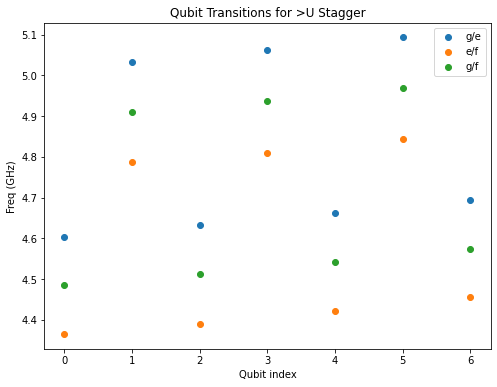

In [50]:
latticefreq = 4.803
detunearray = []
geefdetuning = 150/1e3
NNNspacing = 30/1e3
for ii in range(7):
    if(ii%2==0):
        detunearray.append(-1*geefdetuning/2 + NNNspacing*(ii/2))
    if(ii%2==1):
        detunearray.append(1*geefdetuning/2 + NNNspacing*((ii+1)/2))
Umean = -0.250
freqlist = []
for ii in range(len(detunearray)):
    freqlist.append(latticefreq + (Umean/2)*(-1)**ii + detunearray[ii])
# freqlist = np.array([4.749676,4.84949,4.680245,4.900071,4.717056,4.875475,4.733646])
Uarray = np.array([-0.23807086, -0.24564598, -0.24258586, -0.2535195 , -0.24130961,
       -0.24861161, -0.23806611])
eflist = freqlist + Uarray
gflist = freqlist + Uarray/2
plt.figure(figsize = (8,6))
plt.scatter(range(len(freqlist)),freqlist,label = 'g/e')
plt.scatter(range(len(freqlist)),eflist,label = 'e/f')
plt.scatter(range(len(freqlist)),gflist,label = 'g/f')
# plt.axhline(freqlist[1] + Uarray[1],c = 'k')
plt.legend()
plt.xlabel('Qubit index')
plt.ylabel('Freq (GHz)')
# plt.text(1.1,freqlist[1] + Uarray[1]+0.0050,'Hybridized Resonance')
plt.title('Qubit Transitions for >U Stagger')

In [51]:
np.mean(freqlist[0:-1])

4.848

In [52]:
np.array(freqlist) - 4.848

array([-0.245,  0.185, -0.215,  0.215, -0.185,  0.245, -0.155])